In [ ]:
import sys
import os
from pathlib import Path

# 1. Configuramos la raíz del proyecto de forma absoluta

BASE_DIR = Path(os.getcwd()).parent 
os.chdir(BASE_DIR) 

if str(BASE_DIR) not in sys.path:
    sys.path.append(str(BASE_DIR))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pipeline.forecast import predecir_hibrido

# 2.Ejecutamos
df = predecir_hibrido("santander", dias_forecast=7, modo="normal")

# 3. Preparación para el gráfico
df['fecha_label'] = pd.to_datetime(df['fecha']).dt.strftime('%d-%b')
print("✅ Predicción cargada con éxito")


--- 🌪️ Generando Pronóstico con Ajuste de Realidad: santander (NORMAL) ---
Día 1 | Viento: 242° | SARIMA: 17.00 | RES: +3.10 | FINAL: 20.15
Día 2 | Viento: 254° | SARIMA: 16.34 | RES: -6.00 | FINAL: 10.30
Día 3 | Viento: 204° | SARIMA: 15.55 | RES: +0.19 | FINAL: 15.75
Día 4 | Viento: 226° | SARIMA: 15.00 | RES: +2.54 | FINAL: 17.57
Día 5 | Viento: 240° | SARIMA: 14.65 | RES: +1.21 | FINAL: 15.91
Día 6 | Viento: 219° | SARIMA: 14.58 | RES: +1.61 | FINAL: 16.21
Día 7 | Viento: 240° | SARIMA: 14.65 | RES: +1.45 | FINAL: 16.13
✅ Predicción cargada con éxito


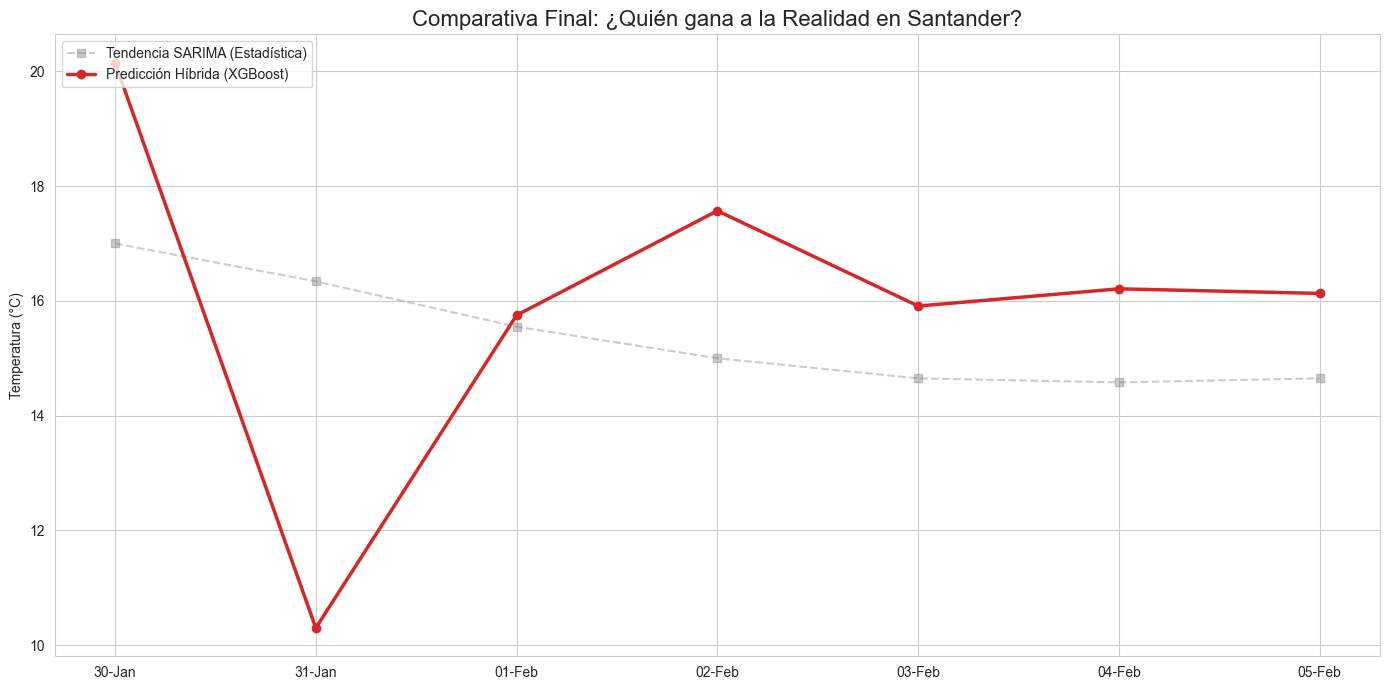

In [2]:
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# 1. DATOS REALES (El objetivo)
if 'temperature_2m_mean' in df.columns:
    plt.plot(df['fecha_label'], df['temperature_2m_mean'], label='Realidad (OpenMeteo)', 
             color='black', linewidth=3, marker='x', markersize=10, zorder=5)

# 2. BASE SARIMA
plt.plot(df['fecha_label'], df['sarima'], label='Tendencia SARIMA (Estadística)', 
         color='gray', linestyle='--', marker='s', alpha=0.4)

# 3. PREDICCIÓN HÍBRIDA
plt.plot(df['fecha_label'], df['hibrida'], label='Predicción Híbrida (XGBoost)', 
         color='tab:red', linestyle='-', marker='o', linewidth=2.5)

# 4. ANOTACIONES DE ERROR (Diferencia vs Realidad)
if 'temperature_2m_mean' in df.columns:
    for i in range(len(df)):
        error_hibrido = abs(df['hibrida'].iloc[i] - df['temperature_2m_mean'].iloc[i])
        error_sarima = abs(df['sarima'].iloc[i] - df['temperature_2m_mean'].iloc[i])
        
        # Si el híbrido es mejor, lo marcamos con una pequeña estrella o texto
        if error_hibrido < error_sarima:
            plt.annotate('⭐ Mejor', xy=(df['fecha_label'].iloc[i], df['hibrida'].iloc[i]),
                         xytext=(0, 15), textcoords='offset points', ha='center', 
                         fontsize=8, color='gold', fontweight='bold')

plt.title("Comparativa Final: ¿Quién gana a la Realidad en Santander?", fontsize=16)
plt.ylabel("Temperatura (°C)")
plt.legend(frameon=True, loc='upper left')
plt.tight_layout()
plt.show()